# Positional Encodings and Variants in Transformers using PyTorch and Hugging Face

One of the key innovations behind transformers is the concept of positional encodings. In this tutorial, we'll dive deep into the workings of positional encodings, explore their variants, and see how to implement them using PyTorch and Hugging Face's Transformers library.

## Understanding Positional Encodings

At the heart of transformers is the self-attention mechanism, which allows the model to weigh the importance of different parts of the input data. However, by design, self-attention does not consider the order of the data. This is where positional encodings come in, providing a way to incorporate sequence order into the model.

### Why Positional Encodings?

Imagine trying to understand a sentence without knowing the order of the words. The meaning would be lost, right? Similarly, for a transformer to understand sequence data (like text), it needs to know the order of the elements in the sequence. Positional encodings are added to the input embeddings to provide this order information.

### The Original Sinusoidal Positional Encoding

The original transformer model uses a sinusoidal function to generate positional encodings. This method generates a unique encoding for each position, using sine and cosine functions of different frequencies.

#### Code Implementation

Let's start by implementing the original sinusoidal positional encoding in PyTorch.


In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

class SinusoidalPositionalEncoding(nn.Module):
    def __init__(self, d_model, max_len=5000):
        super(SinusoidalPositionalEncoding, self).__init__()
        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-np.log(10000.0) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        self.register_buffer('pe', pe)

    def forward(self, x):
        x = x + self.pe[:x.size(0)]
        return x

This SinusoidalPositionalEncoding class generates a positional encoding matrix that is added to the input embeddings. Let's visualize these encodings:

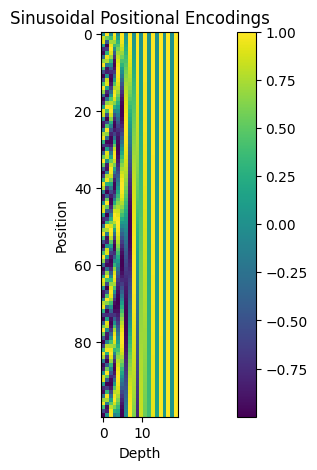

In [2]:
plt.figure(figsize=(15,5))
pe = SinusoidalPositionalEncoding(20, 100)
plt.imshow(pe.pe.numpy())
plt.title("Sinusoidal Positional Encodings")
plt.xlabel("Depth")
plt.ylabel("Position")
plt.colorbar()
plt.show()


## Variants of Positional Encodings
### Learnable Positional Encodings
An alternative to the fixed sinusoidal encodings is learnable positional encodings, where the model learns the best way to encode position during training.

In [3]:
class LearnablePositionalEncoding(nn.Module):
    def __init__(self, d_model, max_len=5000):
        super(LearnablePositionalEncoding, self).__init__()
        self.pe = nn.Parameter(torch.zeros(max_len, d_model))

    def forward(self, x):
        x = x + self.pe[:x.size(0)]
        return x


### Using Hugging Face for Positional Encoding
Hugging Face's Transformers library provides an easy way to use transformers with various positional encoding strategies. Let's see how to use a transformer model from Hugging Face and inspect its positional encoding.

First, install the necessary package:

In [4]:
!pip install -q transformers

Now, let's load a model and visualize positional encodings (**you may hardly see the color differences below**):

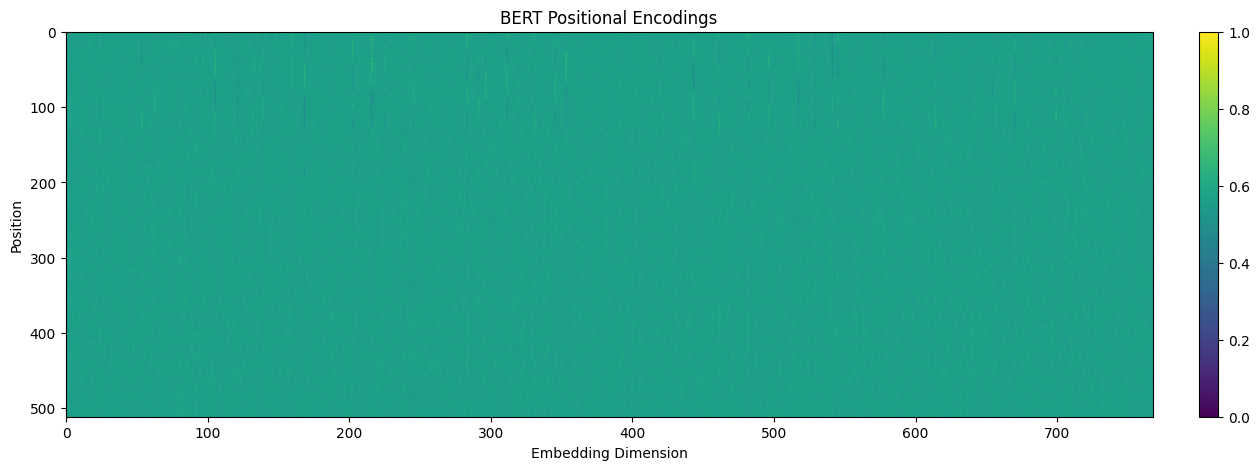

In [13]:
import matplotlib.pyplot as plt
from transformers import BertModel, BertTokenizer
import numpy as np

# Load BERT model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# Inspect the positional embeddings
pos_enc = model.embeddings.position_embeddings.weight.detach().numpy()

# Normalize the embeddings for better visualization
norm_pos_enc = (pos_enc - np.min(pos_enc)) / (np.max(pos_enc) - np.min(pos_enc))

plt.figure(figsize=(15, 5))
# Specify a colormap and adjust colorbar limits
cax = plt.imshow(norm_pos_enc, cmap='viridis', aspect='auto')
plt.title("BERT Positional Encodings")
plt.xlabel("Embedding Dimension")
plt.ylabel("Position")
plt.colorbar(cax, fraction=0.025, pad=0.04)
plt.show()

## Conclusion and Reproducibility
In this tutorial, we explored positional encodings and their crucial role in transformers. We implemented sinusoidal positional encoding, discussed its variants, and utilized Hugging Face's Transformers library to inspect a pre-trained model's positional encoding.

To ensure reproducibility, always check the version of the packages used:

In [6]:
import torch
import transformers

print(f"PyTorch Version: {torch.__version__}")
print(f"Transformers Version: {transformers.__version__}")

PyTorch Version: 2.2.1+cu121
Transformers Version: 4.38.2
